In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np

In [18]:
df = pd.read_csv('dataset/housing.csv')

print(df["ocean_proximity"].value_counts())

df.info()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


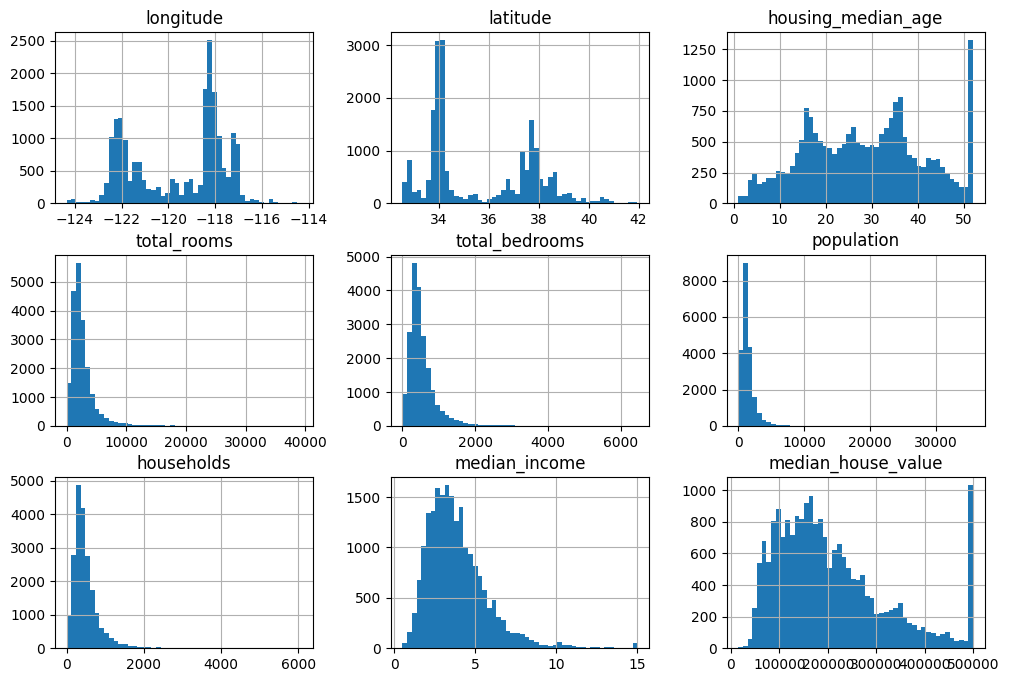

In [19]:
df.hist(bins = 50, figsize=(12, 8))
plt.show()

We could split the dataset by random sampling, but this introduces sampling bias into our data, so we do stratified sampling, which splits the population into distinct subgroups called strata, and samples are taken from each stratum

In [20]:
# splits the data into 5 different stratas, and then stratified sampling can be performed
df["income_cat"] = pd.cut(df["median_income"], bins = [0., 1.5, 3.0, 4.5, 6., np.inf], labels = [1,2,3,4,5])

strat_train_set, strat_test_set = train_test_split(df, test_size=0.2, stratify=df["income_cat"], random_state=42)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [21]:
# dropping "income_cat"
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [22]:
housing = strat_train_set.copy()

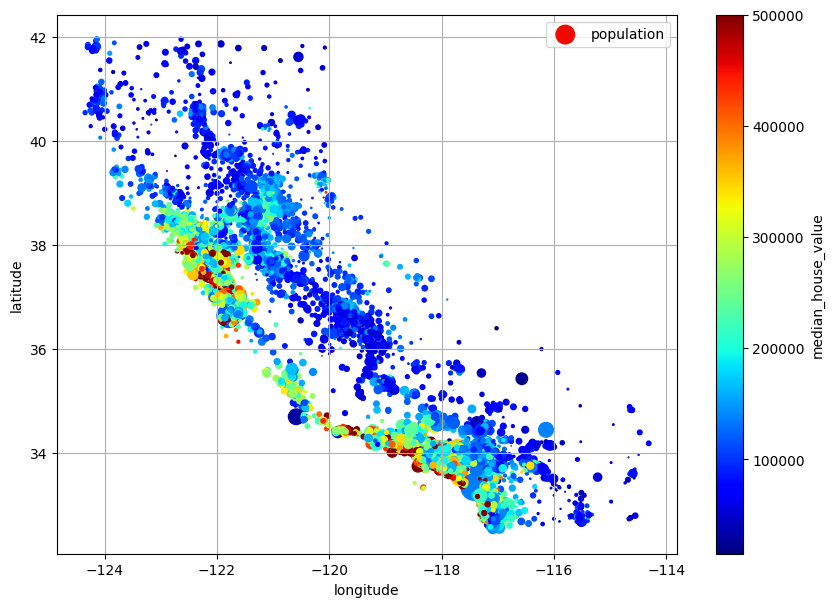

In [23]:
# scatter plot of longitude and latitude
df.plot(kind="scatter", x = "longitude", y = "latitude", grid=True, s=df["population"]/100, label = "population",
        c = "median_house_value", cmap = "jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))
plt.show()

In [24]:
mod_df = df.drop("ocean_proximity", axis=1)

In [25]:
# correlation of each attribute to the median house value
corr_matrix = mod_df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

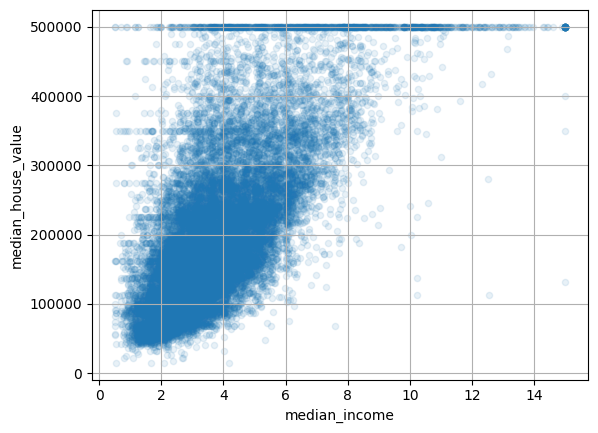

In [26]:
df.plot(kind="scatter", x="median_income", y = "median_house_value", alpha = 0.1, grid=True)
plt.show()

In [27]:
df = housing.drop("median_house_value", axis = 1)
df_labels = housing["median_house_value"].copy()

In [30]:
# Simple imputer to handle missing values
imputer = SimpleImputer(strategy="median")

housing_num = df.select_dtypes(include=[np.number])
imputer.fit(housing_num)

X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [ ]:
# Handling non-numerical attributes
housing_cat = df[["ocean_proximity"]]
print(housing_cat.head())

# Encoding each category of ocean proximity 
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

      ocean_proximity
13096        NEAR BAY
14973       <1H OCEAN
3785           INLAND
14689          INLAND
20507      NEAR OCEAN


In [ ]:
# Handling non-numerical attributes using One-hot encoding
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat) # returns a sparse matrix